# Library

In [1]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic') 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier, Pool

In [4]:
from tqdm.notebook import tqdm

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [6]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')

In [7]:
display(train.head(3), train.tail(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D
96293,TRAIN_96293,8640000,36 months,10+ years,RENT,50400000,11.80,14,신용 카드,0,596148,274956.0,0.0,0.0,C


In [8]:
display(test.head(3), test.tail(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0
64196,TEST_64196,6000000,36 months,9 years,RENT,180000000,9.07,10,부채 통합,0,308880,48960.0,0.0,0.0


# Basic Information

In [9]:
print(train.shape, test.shape)

(96294, 15) (64197, 14)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [11]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [12]:
for col in train[['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']].columns:

    print(train[col].value_counts())

대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64
근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64
주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64
대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64
대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64


# EDA

## Credit rating by Categorical Data

In [13]:
def credits_level_counts(col):

    unique_list = list(train[col].unique())
    
    for unique in unique_list:
    
        cond_unique = (train[col]==unique)
        print(unique)
        print(train.loc[cond_unique]['대출등급'].value_counts())
        print()

In [14]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

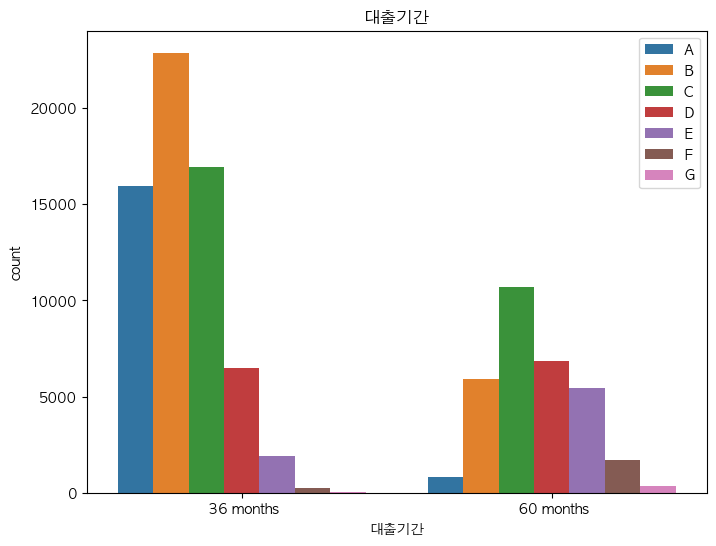


 36 months
대출등급
B    22883
C    16935
A    15952
D     6485
E     1895
F      270
G       59
Name: count, dtype: int64

 60 months
대출등급
C    10688
D     6869
B     5934
E     5459
F     1684
A      820
G      361
Name: count, dtype: int64



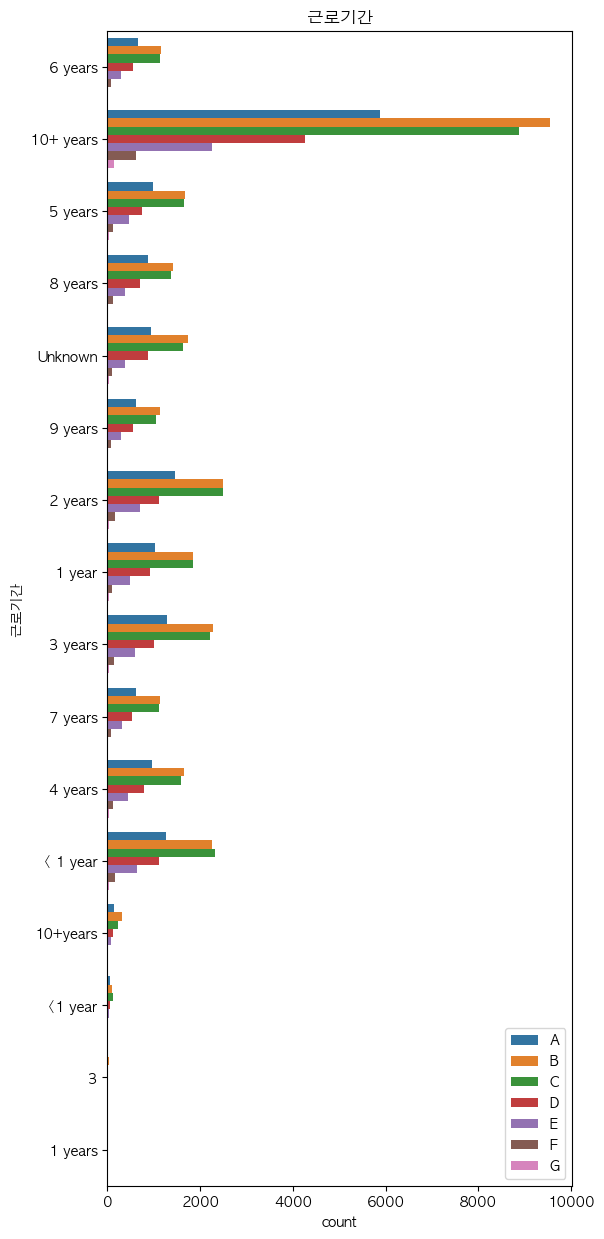


6 years
대출등급
B    1157
C    1124
A     650
D     543
E     296
F      85
G      19
Name: count, dtype: int64

10+ years
대출등급
B    9554
C    8882
A    5872
D    4262
E    2254
F     627
G     134
Name: count, dtype: int64

5 years
대출등급
B    1679
C    1646
A     986
D     736
E     475
F     119
G      24
Name: count, dtype: int64

8 years
대출등급
B    1417
C    1364
A     867
D     707
E     385
F     128
G      20
Name: count, dtype: int64

Unknown
대출등급
B    1742
C    1628
A     934
D     872
E     378
F      92
G      25
Name: count, dtype: int64

9 years
대출등급
B    1137
C    1049
A     621
D     545
E     289
F      85
G      18
Name: count, dtype: int64

2 years
대출등급
C    2495
B    2493
A    1454
D    1107
E     695
F     170
G      36
Name: count, dtype: int64

1 year
대출등급
B    1845
C    1845
A    1025
D     919
E     478
F     109
G      28
Name: count, dtype: int64

3 years
대출등급
B    2270
C    2209
A    1295
D    1015
E     604
F     149
G      39
Name: count, dtype: int64

7 years


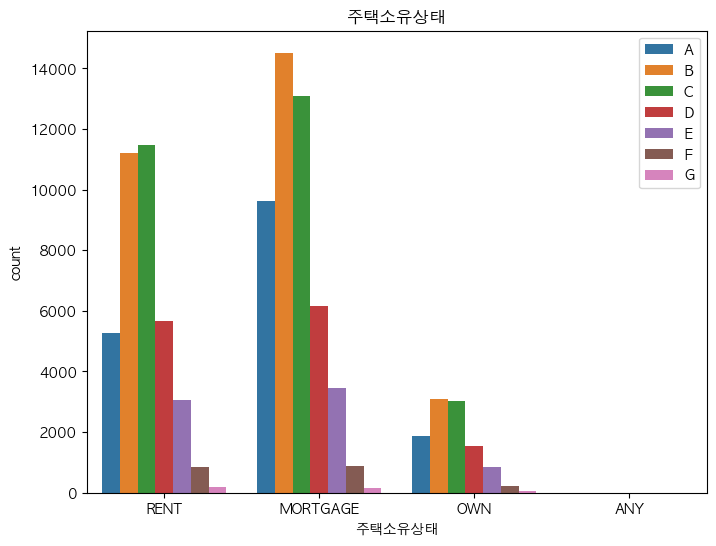


RENT
대출등급
C    11478
B    11200
D     5653
A     5268
E     3056
F      855
G      195
Name: count, dtype: int64

MORTGAGE
대출등급
B    14518
C    13106
A     9640
D     6163
E     3452
F      883
G      172
Name: count, dtype: int64

OWN
대출등급
B    3099
C    3038
A    1864
D    1538
E     846
F     216
G      53
Name: count, dtype: int64

ANY
대출등급
C    1
Name: count, dtype: int64



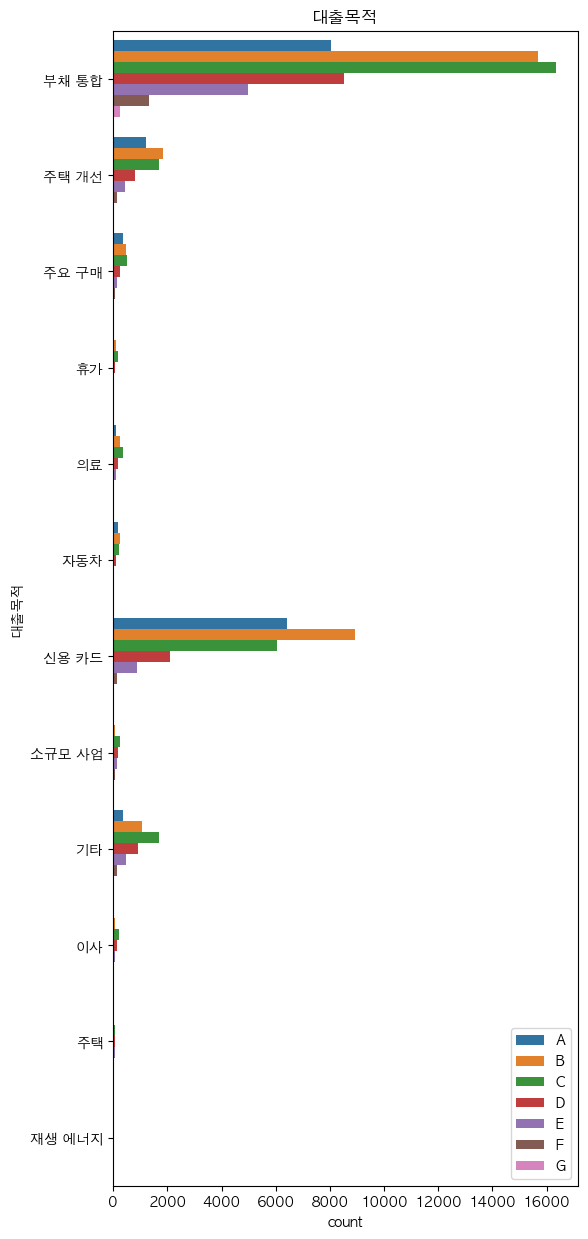


부채 통합
대출등급
C    16349
B    15680
D     8529
A     8036
E     4979
F     1311
G      266
Name: count, dtype: int64

주택 개선
대출등급
B    1845
C    1689
A    1225
D     805
E     425
F     145
G      26
Name: count, dtype: int64

주요 구매
대출등급
C    503
B    479
A    372
D    238
E    150
F     53
G      8
Name: count, dtype: int64

휴가
대출등급
C    196
B    119
D     78
A     40
E     27
F      4
G      2
Name: count, dtype: int64

의료
대출등급
C    375
B    238
D    197
A    104
E     91
F     27
G      7
Name: count, dtype: int64

자동차
대출등급
B    258
C    213
A    174
D     87
E     46
F     15
G      4
Name: count, dtype: int64

신용 카드
대출등급
B    8917
A    6424
C    6036
D    2092
E     877
F     137
G      17
Name: count, dtype: int64

소규모 사업
대출등급
C    249
D    192
E    158
B     75
F     64
G     30
A     19
Name: count, dtype: int64

기타
대출등급
C    1705
B    1080
D     916
E     478
A     356
F     147
G      43
Name: count, dtype: int64

이사
대출등급
C    203
D    131
B     86
E     50
F     18
A     13
G  

In [16]:
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=train,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
       print()
       credits_level_counts(col=col)

    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=train, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()
        print()
        credits_level_counts(col=col)


## Credit rating by Numerical Data

In [17]:
list_num = ['연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
            '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [18]:
def num_statistic(data, col):
    statistic_df = pd.DataFrame()

    for level in hue_order:
        level_df = data.loc[(data['대출등급']==level)][[col]].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        level_df.index = [level]
        
        statistic_df = pd.concat([statistic_df, level_df], axis=0)

    display(statistic_df)
    print()

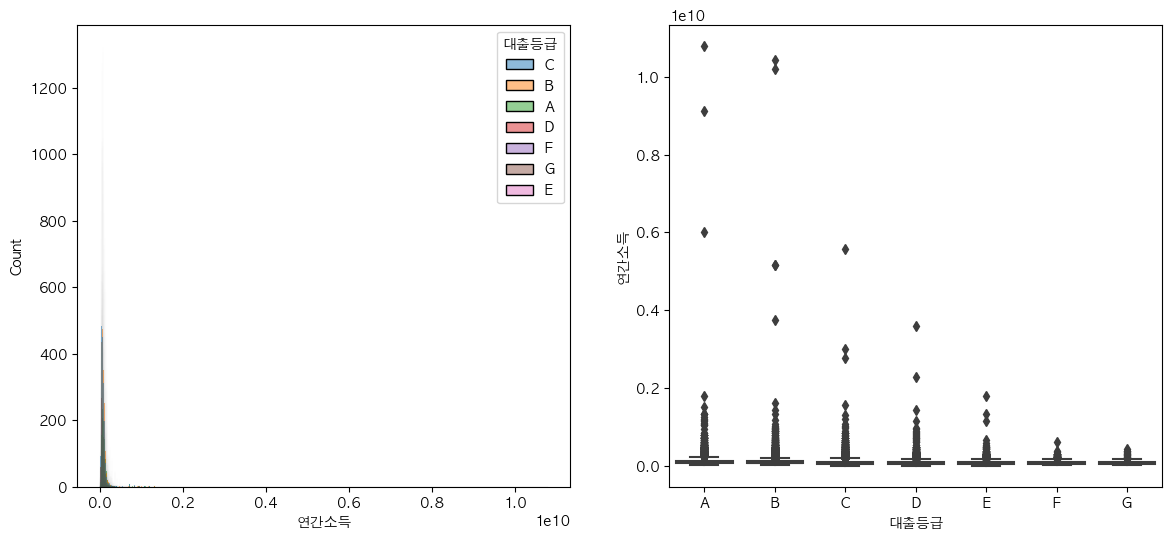

,mean,std,min,25%,50%,75%,max
A,1.124911e+08,1.396115e+08,11424000.0,67200000.0,96000000.0,132000000.0,1.080000e+10
B,9.570640e+07,1.160385e+08,9600000.0,58386000.0,81600000.0,114000000.0,1.044000e+10
C,8.903804e+07,7.227919e+07,0.0,54000000.0,75600000.0,108000000.0,5.576640e+09
D,8.359673e+07,6.622318e+07,2124000.0,51454800.0,72000000.0,100800000.0,3.600000e+09
E,8.492864e+07,5.582495e+07,1440000.0,54000000.0,73200000.0,102000000.0,1.800000e+09
F,8.434506e+07,4.500624e+07,10627200.0,54000000.0,75430800.0,102000000.0,6.000000e+08
G,8.258034e+07,5.407082e+07,10555200.0,50400000.0,70800000.0,96000000.0,4.344000e+08


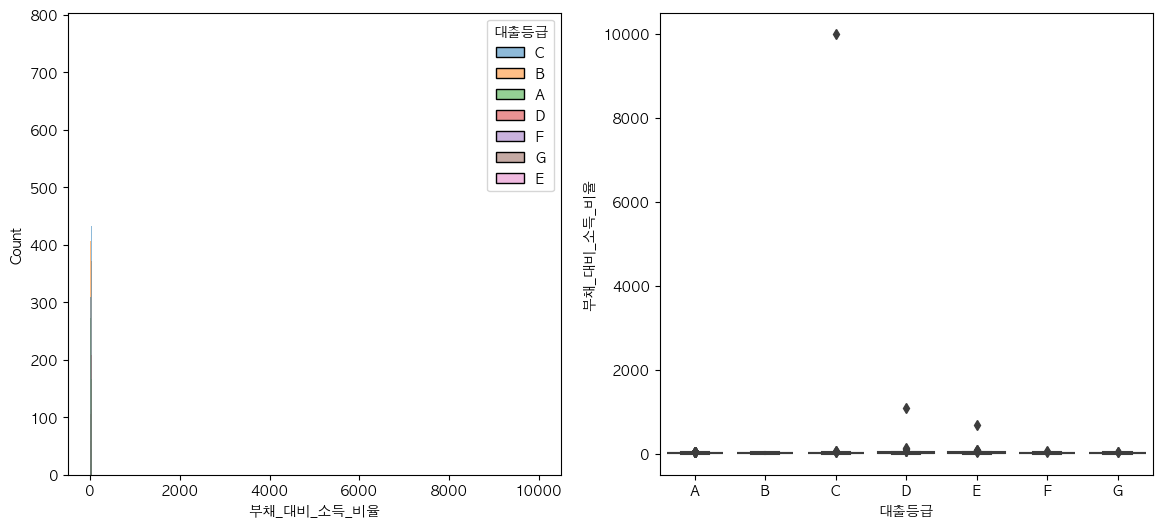

,mean,std,min,25%,50%,75%,max
A,16.547850,7.558913,0.00,10.8200,16.130,21.8700,39.80
B,18.129529,8.191684,0.00,11.9300,17.600,23.9800,41.69
C,20.270095,60.681872,0.00,13.3000,19.510,26.3050,9999.00
D,21.808465,13.166067,0.00,14.6900,21.610,29.1575,1092.52
E,22.248466,11.977395,0.16,15.3500,21.925,29.2875,672.52
F,21.853710,8.913153,0.66,15.3925,22.125,28.3375,54.36
G,20.691952,8.718104,0.82,14.3525,21.095,26.5350,47.61


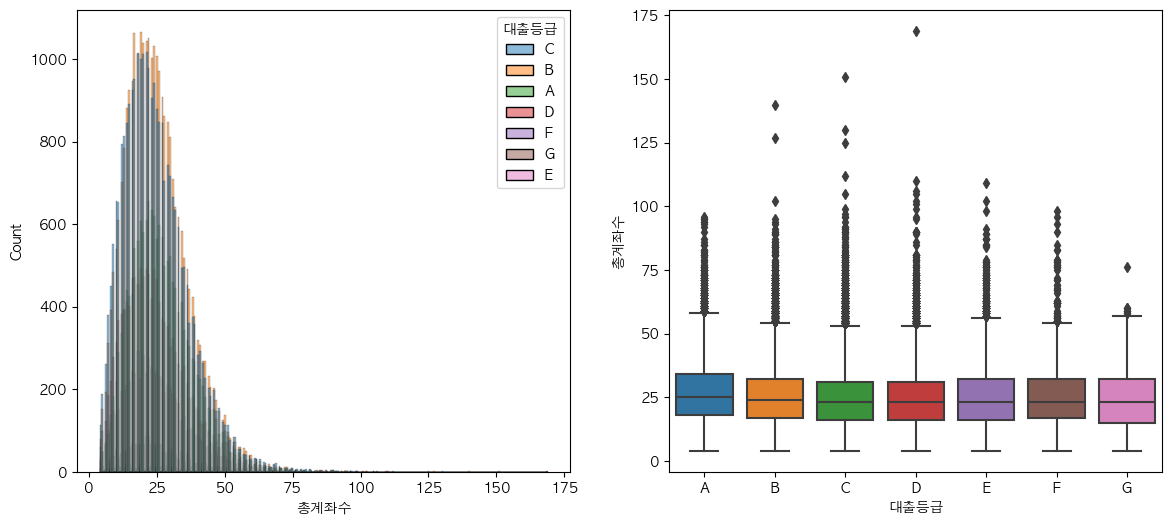

,mean,std,min,25%,50%,75%,max
A,26.910684,11.788615,4.0,18.0,25.0,34.0,96.0
B,25.223375,11.765557,4.0,17.0,24.0,32.0,140.0
C,24.695073,12.195646,4.0,16.0,23.0,31.0,151.0
D,24.705107,12.357153,4.0,16.0,23.0,31.0,169.0
E,25.320642,12.522195,4.0,16.0,23.0,32.0,109.0
F,25.543501,12.950036,4.0,17.0,23.0,32.0,98.0
G,24.550000,12.482346,4.0,15.0,23.0,32.0,76.0


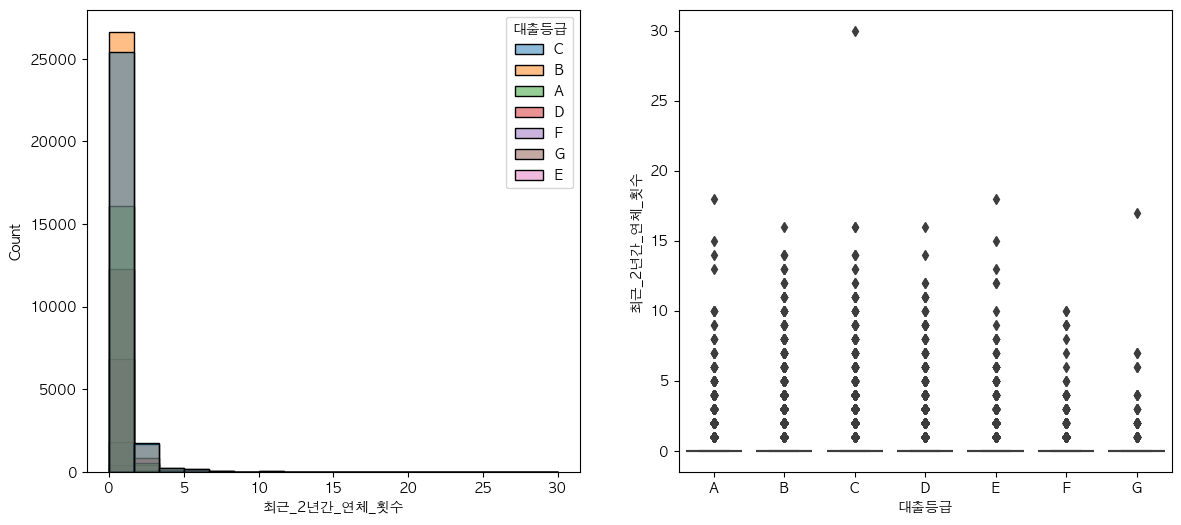

,mean,std,min,25%,50%,75%,max
A,0.218698,0.704163,0.0,0.0,0.0,0.0,18.0
B,0.365409,0.947582,0.0,0.0,0.0,0.0,16.0
C,0.380299,0.966606,0.0,0.0,0.0,0.0,30.0
D,0.384379,0.970777,0.0,0.0,0.0,0.0,16.0
E,0.349334,0.914513,0.0,0.0,0.0,0.0,18.0
F,0.361822,0.914466,0.0,0.0,0.0,0.0,10.0
G,0.416667,1.239835,0.0,0.0,0.0,0.0,17.0


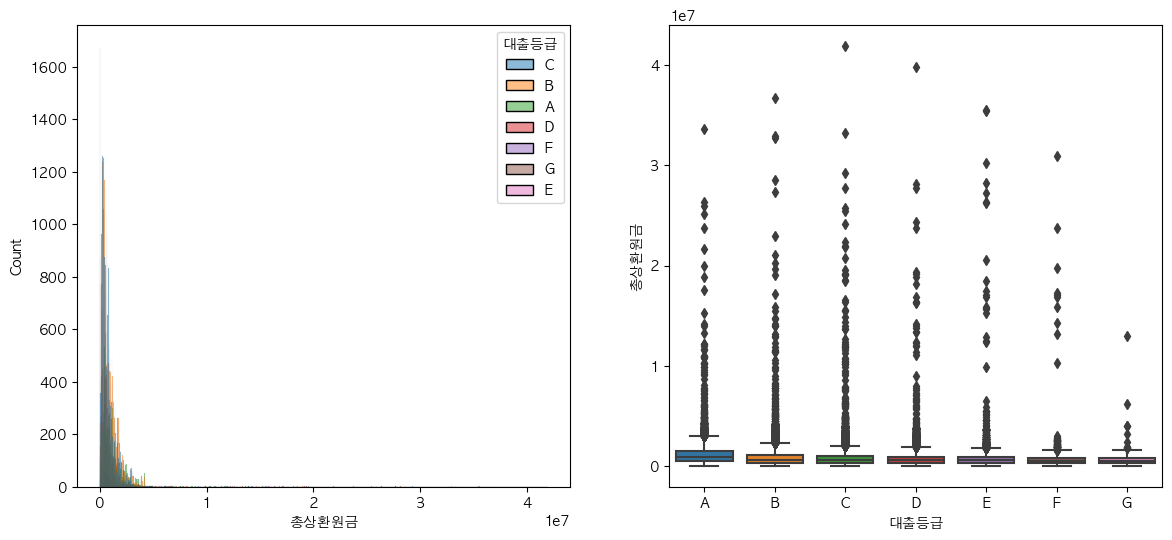

,mean,std,min,25%,50%,75%,max
A,1.066966e+06,1.076776e+06,0.0,444804.0,830280.0,1441248.0,33683988.0
B,8.340144e+05,9.403085e+05,0.0,318336.0,606564.0,1101888.0,36721164.0
C,7.521078e+05,9.753910e+05,0.0,278616.0,552132.0,963672.0,41955936.0
D,7.297173e+05,1.018910e+06,0.0,267948.0,528600.0,908784.0,39793896.0
E,7.074507e+05,1.238723e+06,0.0,288672.0,523908.0,872802.0,35550000.0
F,6.673177e+05,1.368616e+06,0.0,267030.0,490224.0,794940.0,30911292.0
G,5.870190e+05,8.149610e+05,0.0,229296.0,442188.0,764745.0,12937416.0


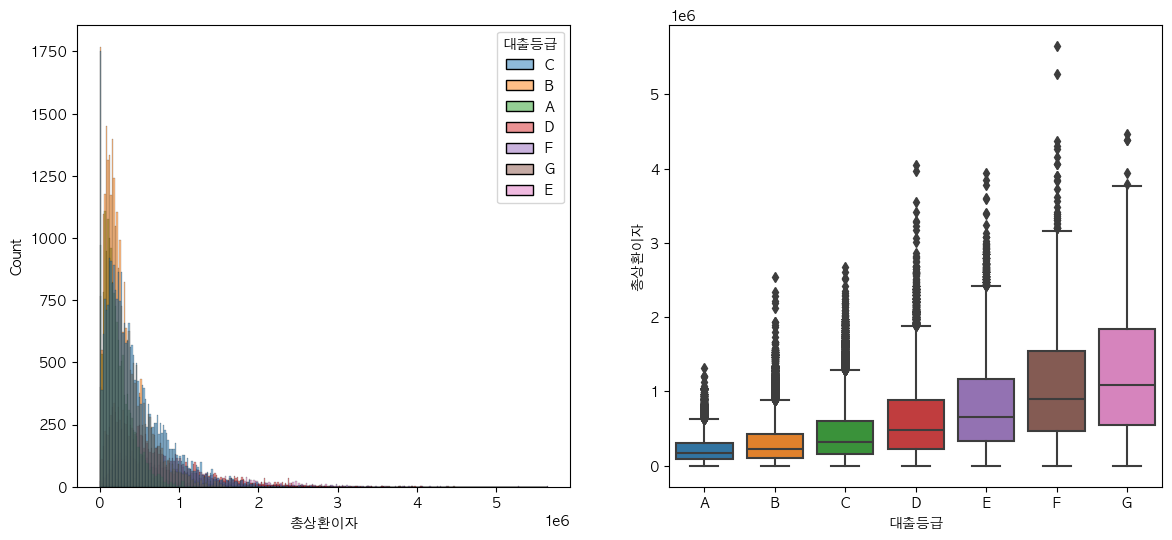

,mean,std,min,25%,50%,75%,max
A,2.240085e+05,183508.609726,0.0,91401.0,175632.0,306678.0,1315908.0
B,3.033410e+05,268912.292532,0.0,110652.0,222228.0,421008.0,2538084.0
C,4.306745e+05,377468.910481,0.0,154560.0,323028.0,607092.0,2671956.0
D,6.117896e+05,520056.028372,0.0,220875.0,474684.0,884532.0,4048740.0
E,8.146975e+05,627671.231203,0.0,338886.0,653004.0,1168896.0,3942252.0
F,1.095274e+06,819704.001437,0.0,470883.0,900930.0,1548396.0,5653416.0
G,1.284655e+06,952955.115509,0.0,549405.0,1089972.0,1844562.0,4464612.0


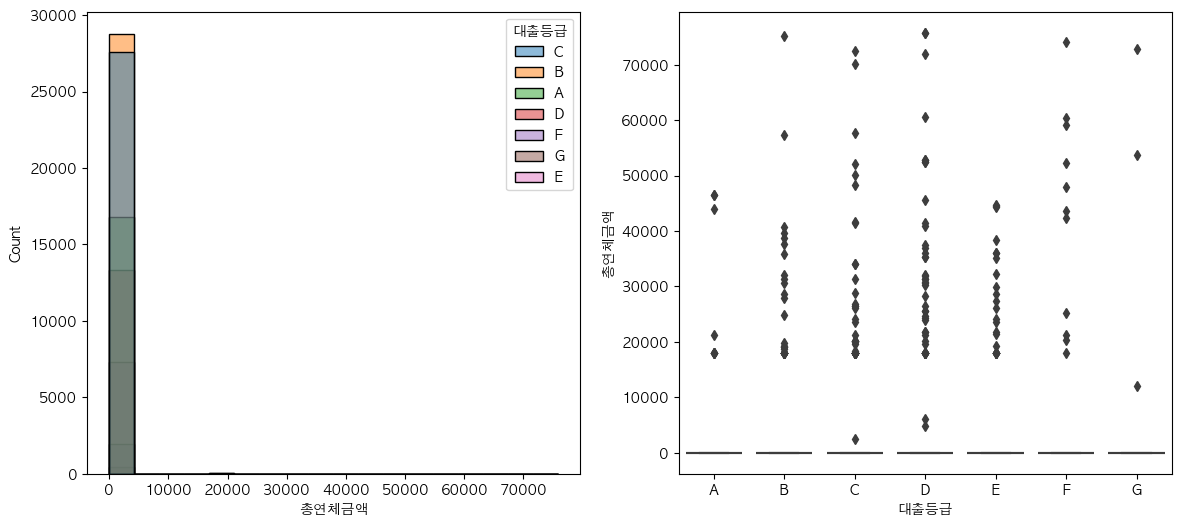

,mean,std,min,25%,50%,75%,max
A,14.806105,704.850463,0.0,0.0,0.0,0.0,46536.0
B,29.441371,983.715162,0.0,0.0,0.0,0.0,75216.0
C,48.052565,1258.793440,0.0,0.0,0.0,0.0,72444.0
D,113.352104,2127.823877,0.0,0.0,0.0,0.0,75768.0
E,94.572206,1678.616326,0.0,0.0,0.0,0.0,44688.0
F,237.801433,3437.789928,0.0,0.0,0.0,0.0,74076.0
G,329.942857,4448.705070,0.0,0.0,0.0,0.0,72864.0


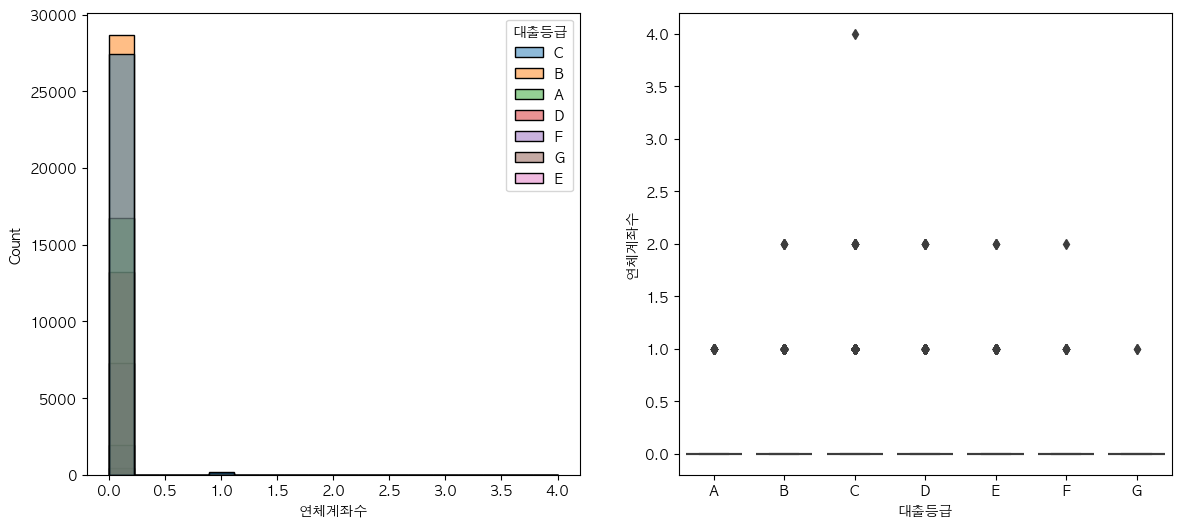

,mean,std,min,25%,50%,75%,max
A,0.001133,0.033640,0.0,0.0,0.0,0.0,1.0
B,0.004789,0.071019,0.0,0.0,0.0,0.0,2.0
C,0.007892,0.094808,0.0,0.0,0.0,0.0,4.0
D,0.008462,0.096382,0.0,0.0,0.0,0.0,2.0
E,0.007615,0.091509,0.0,0.0,0.0,0.0,2.0
F,0.006653,0.087385,0.0,0.0,0.0,0.0,2.0
G,0.004762,0.068924,0.0,0.0,0.0,0.0,1.0


In [19]:
for col in list_num:
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    sns.histplot(data=train, x=col, hue='대출등급', ax=ax[0])
    sns.boxplot(data=train, y=col, x='대출등급', order=hue_order, ax=ax[1])
    plt.show()
    num_statistic(train, col)

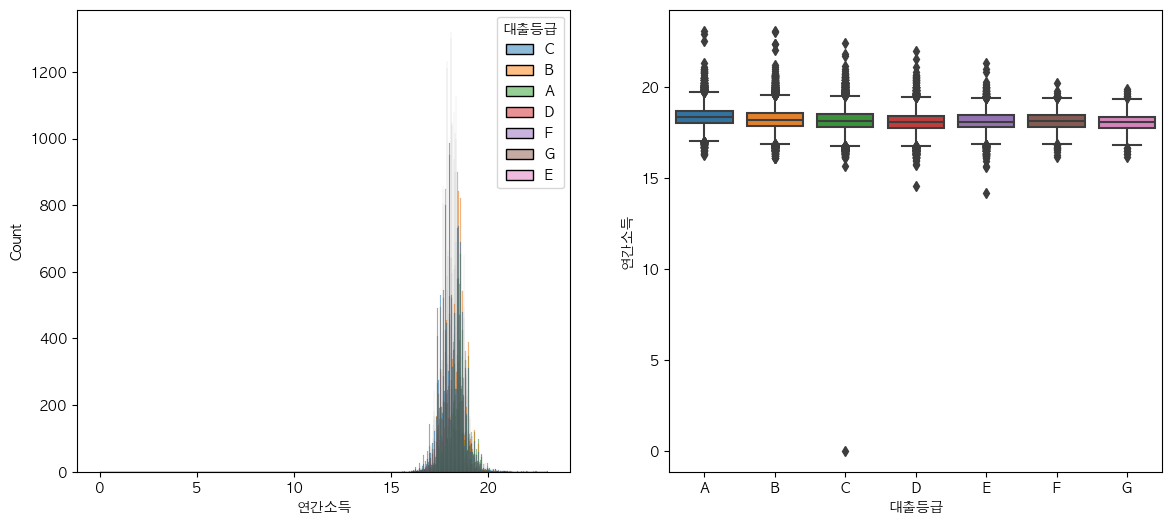

,mean,std,min,25%,50%,75%,max
A,18.378541,0.524259,16.251227,18.023184,18.379859,18.698312,23.102812
B,18.219898,0.525008,16.077274,17.882587,18.217340,18.551709,23.068910
C,18.149136,0.546990,0.000000,17.804495,18.140967,18.497642,22.441852
D,18.088894,0.535462,14.568812,17.756214,18.092177,18.428649,22.004200
E,18.117526,0.521727,14.180154,17.804495,18.108706,18.440483,21.311053
F,18.130382,0.488730,16.178927,17.804495,18.138724,18.440483,20.212440
G,18.074797,0.545557,16.172129,17.735502,18.075370,18.379859,19.889476


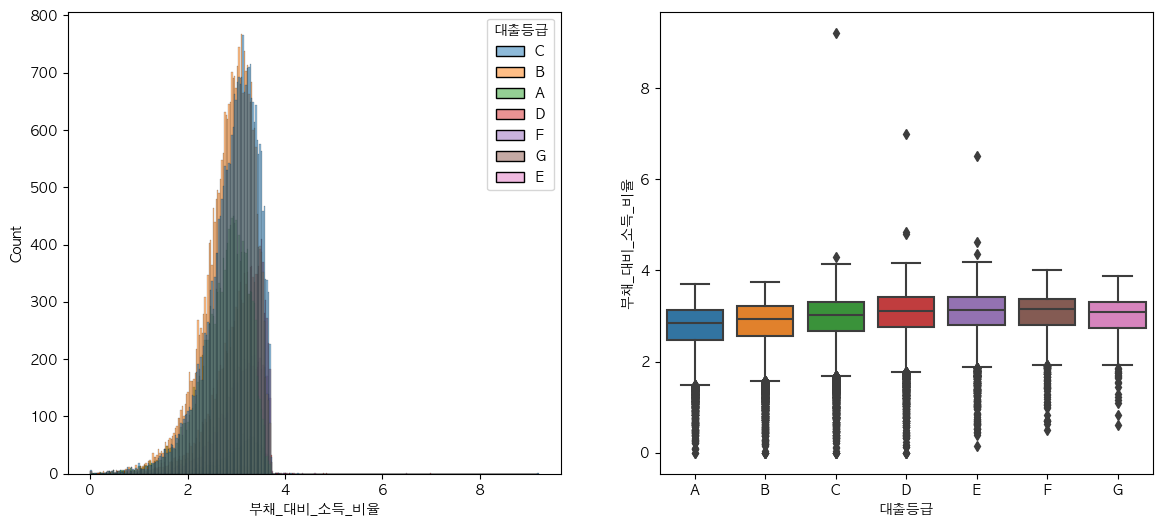

,mean,std,min,25%,50%,75%,max
A,2.750571,0.520028,0.000000,2.469793,2.840831,3.129826,3.708682
B,2.837974,0.517099,0.000000,2.559550,2.923162,3.218076,3.753965
C,2.928448,0.519467,0.000000,2.660260,3.020913,3.307070,9.210340
D,3.011146,0.530180,0.000000,2.753024,3.118392,3.406434,6.997157
E,3.038006,0.508498,0.148420,2.794228,3.132228,3.410735,6.512518
F,3.028930,0.494849,0.506818,2.796824,3.140914,3.378867,4.013857
G,2.969595,0.515295,0.598837,2.731276,3.095351,3.315457,3.883829


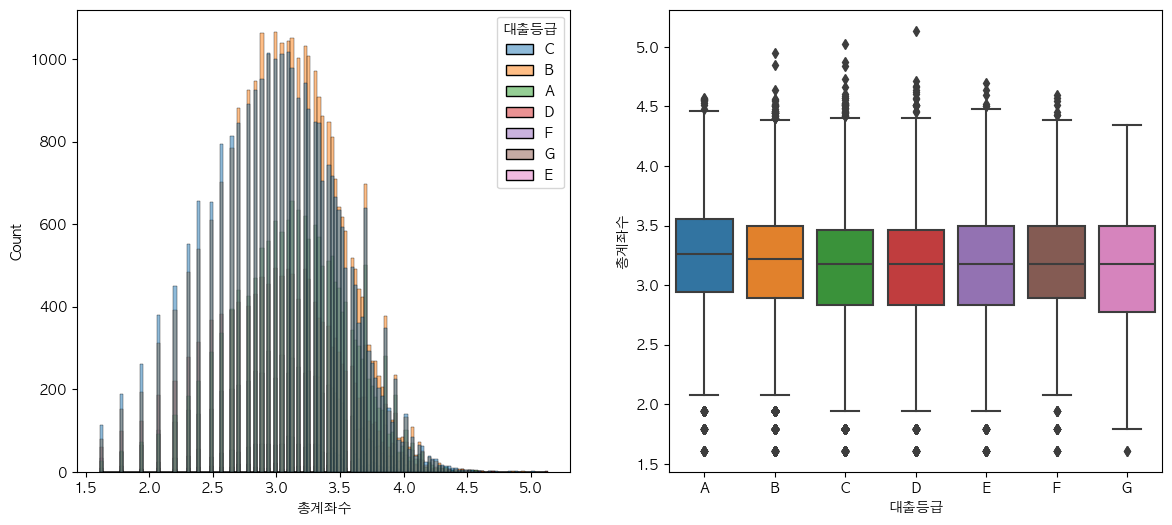

,mean,std,min,25%,50%,75%,max
A,3.237417,0.440951,1.609438,2.944439,3.258097,3.555348,4.574711
B,3.163668,0.468167,1.609438,2.890372,3.218876,3.496508,4.948760
C,3.132289,0.492241,1.609438,2.833213,3.178054,3.465736,5.023881
D,3.130348,0.497010,1.609438,2.833213,3.178054,3.465736,5.135798
E,3.155397,0.495329,1.609438,2.833213,3.178054,3.496508,4.700480
F,3.162794,0.494001,1.609438,2.890372,3.178054,3.496508,4.595120
G,3.112969,0.526552,1.609438,2.772589,3.178054,3.496508,4.343805


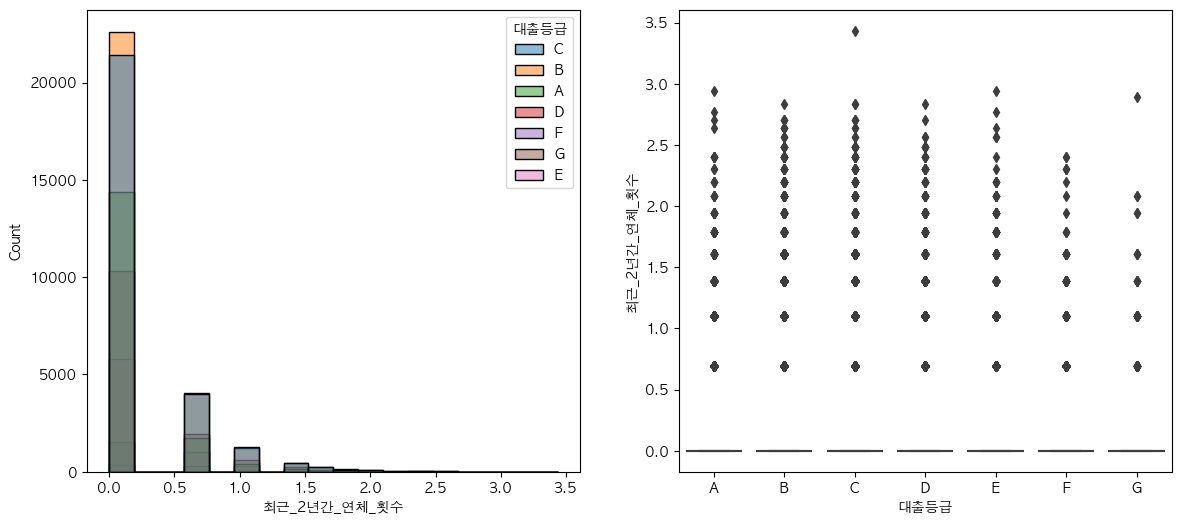

,mean,std,min,25%,50%,75%,max
A,0.123593,0.325478,0.0,0.0,0.0,0.0,2.944439
B,0.196665,0.410253,0.0,0.0,0.0,0.0,2.833213
C,0.205404,0.415975,0.0,0.0,0.0,0.0,3.433987
D,0.206733,0.418329,0.0,0.0,0.0,0.0,2.833213
E,0.190758,0.400603,0.0,0.0,0.0,0.0,2.944439
F,0.197660,0.406633,0.0,0.0,0.0,0.0,2.397895
G,0.208128,0.439090,0.0,0.0,0.0,0.0,2.890372


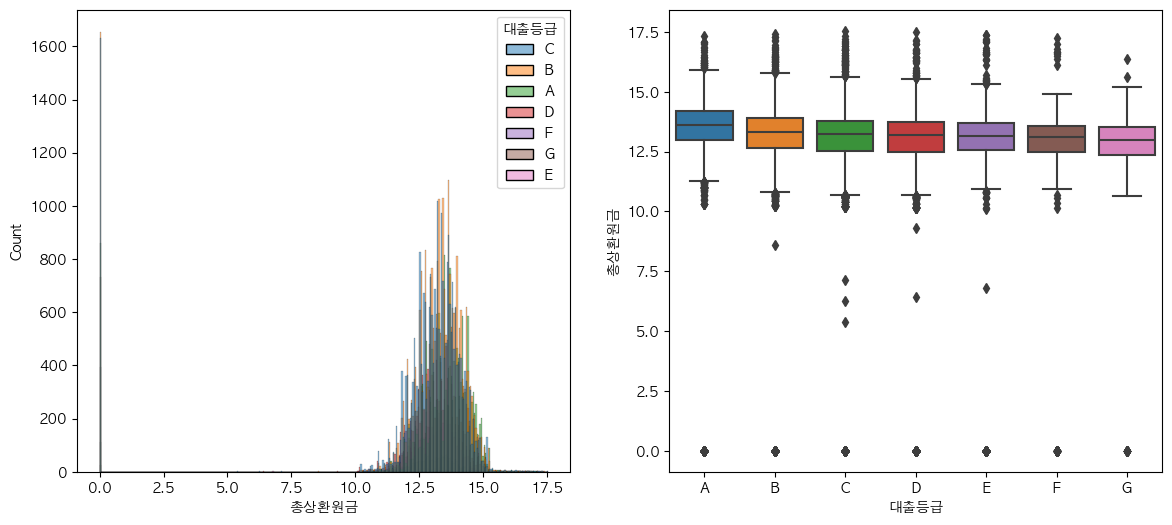

,mean,std,min,25%,50%,75%,max
A,12.929700,3.108544,0.0,13.005391,13.629519,14.181021,17.332533
B,12.599714,3.210231,0.0,12.670866,13.315567,13.912537,17.418864
C,12.457030,3.227887,0.0,12.537593,13.221544,13.778507,17.552131
D,12.472810,3.116086,0.0,12.498552,13.177989,13.719864,17.499224
E,12.483306,3.066789,0.0,12.573050,13.169073,13.679465,17.386451
F,12.374746,3.111588,0.0,12.495120,13.102620,13.586023,17.246632
G,12.235915,3.175435,0.0,12.342759,12.999492,13.547292,16.375634


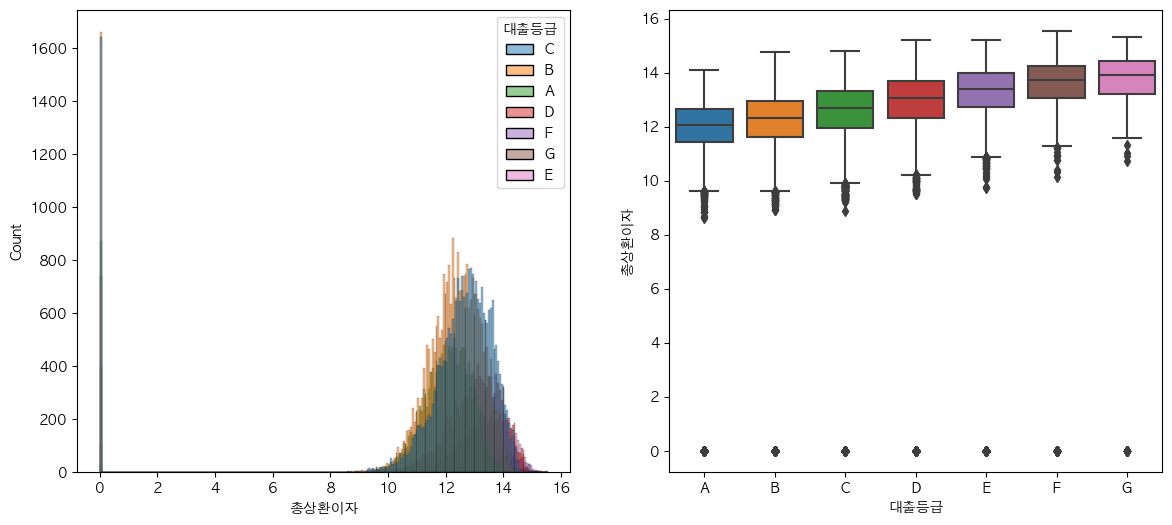

,mean,std,min,25%,50%,75%,max
A,11.450854,2.794072,0.0,11.423023,12.076152,12.633557,14.090038
B,11.633083,2.998498,0.0,11.614154,12.311464,12.950409,14.746920
C,11.928613,3.124806,0.0,11.948344,12.685497,13.316437,14.798322
D,12.311524,3.109503,0.0,12.305357,13.070407,13.692815,15.213917
E,12.657273,3.130794,0.0,12.733422,13.389340,13.971571,15.187263
F,12.931720,3.238288,0.0,13.062367,13.711183,14.252731,15.547771
G,13.044097,3.320152,0.0,13.216554,13.901661,14.427745,15.311693


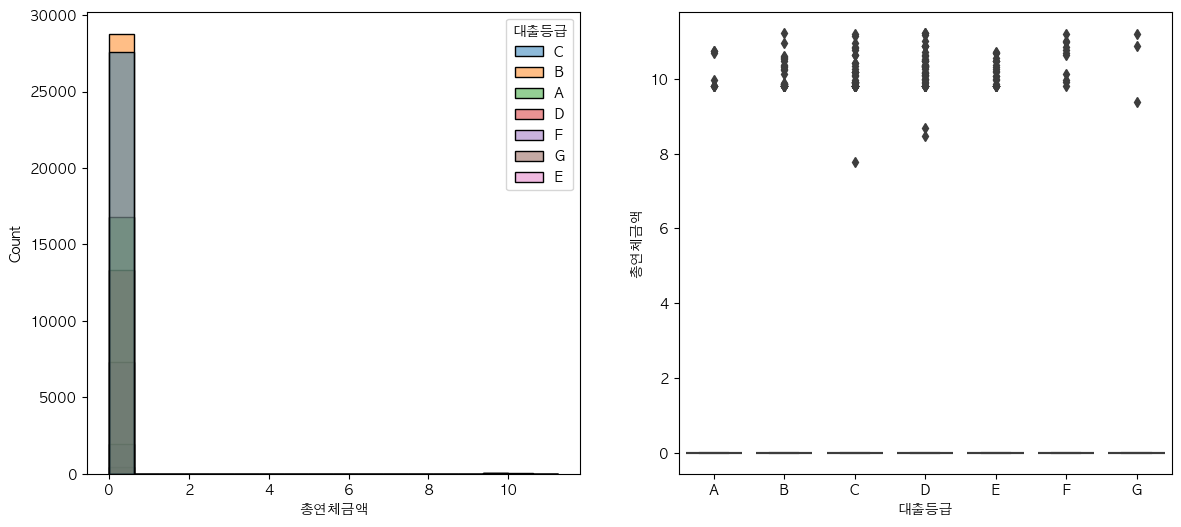

,mean,std,min,25%,50%,75%,max
A,0.005434,0.234750,0.0,0.0,0.0,0.0,10.748003
B,0.011213,0.336568,0.0,0.0,0.0,0.0,11.228133
C,0.018875,0.435169,0.0,0.0,0.0,0.0,11.190583
D,0.036749,0.612750,0.0,0.0,0.0,0.0,11.235445
E,0.035847,0.602171,0.0,0.0,0.0,0.0,10.707483
F,0.059369,0.790056,0.0,0.0,0.0,0.0,11.212860
G,0.074954,0.887255,0.0,0.0,0.0,0.0,11.196364


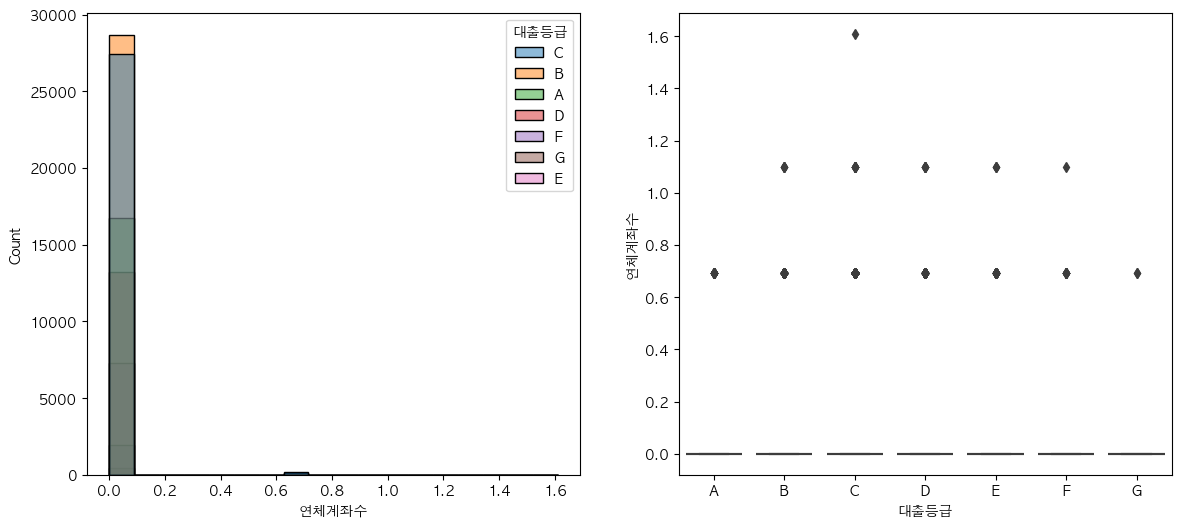

,mean,std,min,25%,50%,75%,max
A,0.000785,0.023317,0.0,0.0,0.0,0.0,0.693147
B,0.003279,0.048211,0.0,0.0,0.0,0.0,1.098612
C,0.005324,0.062264,0.0,0.0,0.0,0.0,1.609438
D,0.005736,0.064370,0.0,0.0,0.0,0.0,1.098612
E,0.005161,0.061097,0.0,0.0,0.0,0.0,1.098612
F,0.004464,0.057482,0.0,0.0,0.0,0.0,1.098612
G,0.003301,0.047775,0.0,0.0,0.0,0.0,0.693147


In [20]:
log_train = train[list_num].apply(lambda x : np.log(x+1))
log_train = pd.concat([log_train, train[['대출등급']]], axis=1)

for col in list_num:
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    sns.histplot(data=log_train, x=col, hue='대출등급', ax=ax[0])
    sns.boxplot(data=log_train, y=col, x='대출등급', order=hue_order, ax=ax[1])
    plt.show()
    num_statistic(log_train, col)